In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [156]:
df=pd.read_csv(r"C:\Users\war machine rocks\Downloads\Bank Customer Churn Prediction.csv")

In [157]:
df[['credit_score','age','tenure','balance','products_number','credit_card','estimated_salary']].head()

# nummerical columns

,credit_score,age,tenure,balance,products_number,credit_card,estimated_salary
0,619,42,2,0.00,1,1,101348.88
1,608,41,1,83807.86,1,0,112542.58
2,502,42,8,159660.80,3,1,113931.57
3,699,39,1,0.00,2,0,93826.63
4,850,43,2,125510.82,1,1,79084.10


In [158]:
df['country'].value_counts()

# ''' we can see we have the data of only 3 countries'''

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [159]:
df.shape

# ''' 1000 rows and 12 columns'''

(10000, 12)

In [160]:
df.columns.value_counts()

customer_id         1
credit_score        1
country             1
gender              1
age                 1
tenure              1
balance             1
products_number     1
credit_card         1
active_member       1
estimated_salary    1
churn               1
Name: count, dtype: int64

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


# Null value imputation

In [162]:
df.isnull().sum()

# no null values in the data set

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [163]:
# DROPPPING UNWANTED COLUMNS 
df.drop(['country','customer_id'],axis=1,inplace=True)

# pearson correlation
checking multicolinearity

Multicollinearity: High correlation between independent variables (multicollinearity) can be problematic. It can make the model coefficients unstable and their interpretation difficult. This happens because when two or more variables are highly correlated, they provide redundant information about the target variable, making it hard for the model to determine the individual effect of each predictor.

Model Simplicity: By identifying and removing highly correlated features, you can simplify the model without losing much information. This can lead to a more interpretable and efficient model.

Feature Selection: Correlation analysis helps in feature selection. If two features are highly correlated, one can be removed to reduce redundancy, which may improve model performance and reduce overfitting.

In [164]:
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [165]:
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

#comverting categorical values in boolean

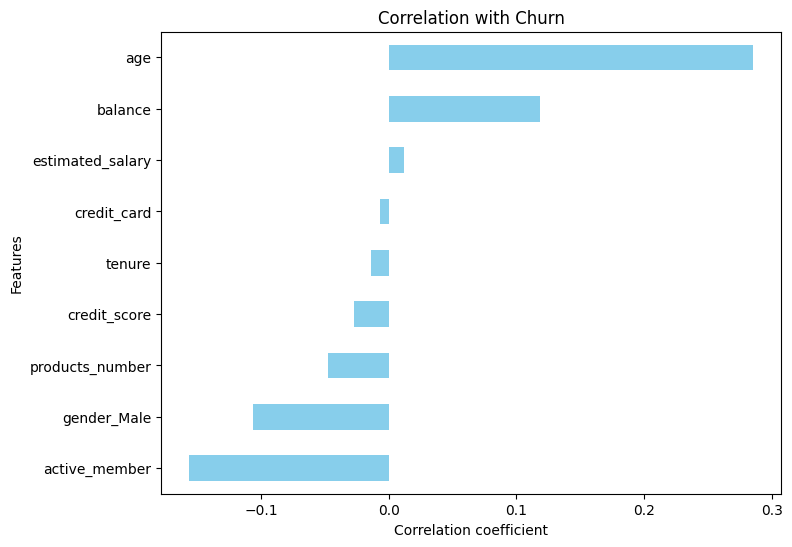

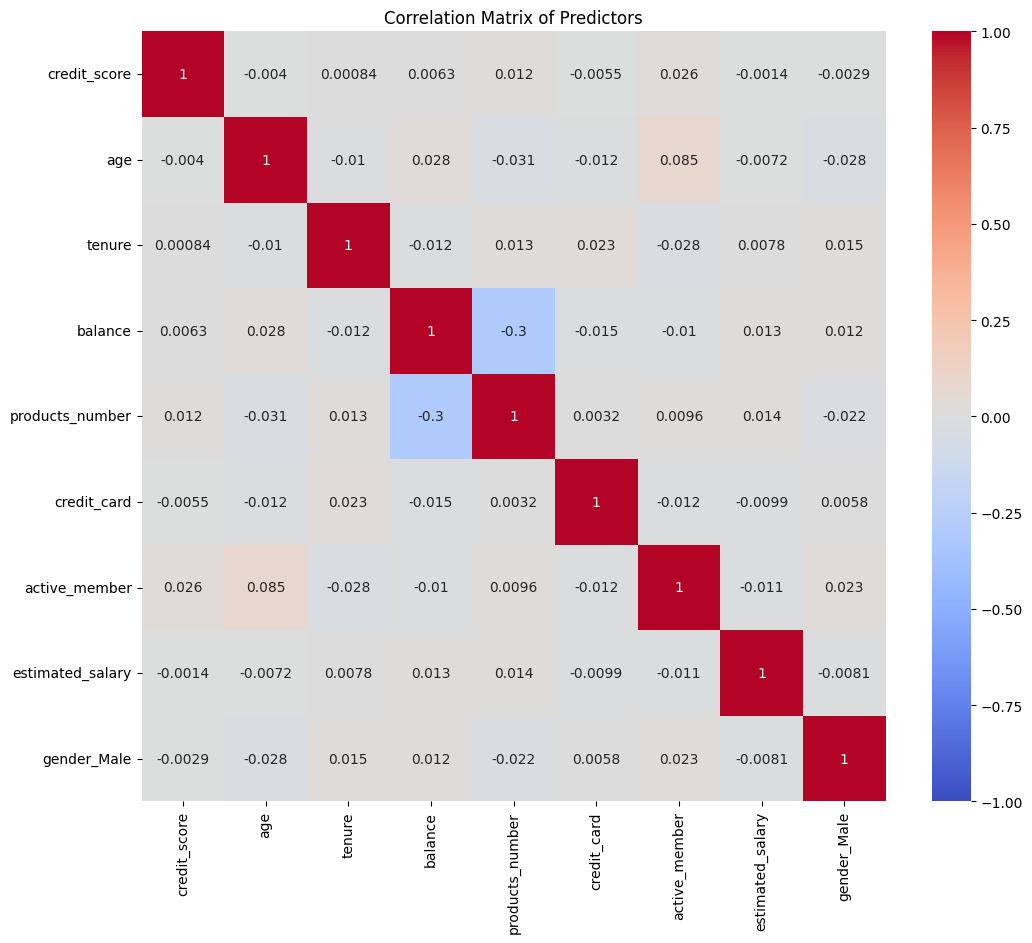

In [166]:
correlations = df.corr()['churn'].drop('churn')

# Plot correlations with churn
plt.figure(figsize=(8, 6))
correlations.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation with Churn')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')
plt.show()

# Check for multicollinearity among predictors
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop('churn', axis=1).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Predictors')
plt.show()

# scalling the numerical values 

In [167]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']] = scaler.fit_transform(df[['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']])

In [168]:
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,False
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,False
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,False
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,False
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,False


In [169]:
# Define features (X) and target (y)
X = df.drop(['churn'], axis=1)
y = df['churn']

In [170]:
X   

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,False
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,False
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,False
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,False
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,False
...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,1,0,-0.066419,True
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,1,1,0.027988,True
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,0,1,-1.008643,False
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,1,0,-0.125231,True


In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [172]:
X_train

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender_Male
7389,0.170424,-0.469311,-0.004426,-1.225848,0.807737,1,0,1.108382,False
9275,-2.312802,0.293517,-1.387538,-0.012892,-0.911583,1,1,-0.747592,True
2995,-1.195351,-0.946079,-1.041760,0.575076,-0.911583,1,0,1.487464,False
5316,0.035916,0.102810,-0.004426,0.467955,-0.911583,1,0,1.278558,True
356,2.063884,1.723821,1.032908,0.806010,0.807737,1,1,0.560069,False
...,...,...,...,...,...,...,...,...,...
9225,-0.584891,-0.660018,-0.350204,0.698607,0.807737,1,1,1.093273,False
4859,1.484464,-1.613554,-0.350204,0.608299,-0.911583,1,1,0.133249,False
3264,0.905045,-0.373958,-0.004426,1.358909,0.807737,1,0,1.414415,True
9845,-0.626278,-0.087897,1.378686,-1.225848,0.807737,1,1,0.846147,False


In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [174]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [175]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.809
Confusion Matrix:
[[1545   50]
 [ 332   73]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.59      0.18      0.28       405

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.78      0.81      0.77      2000



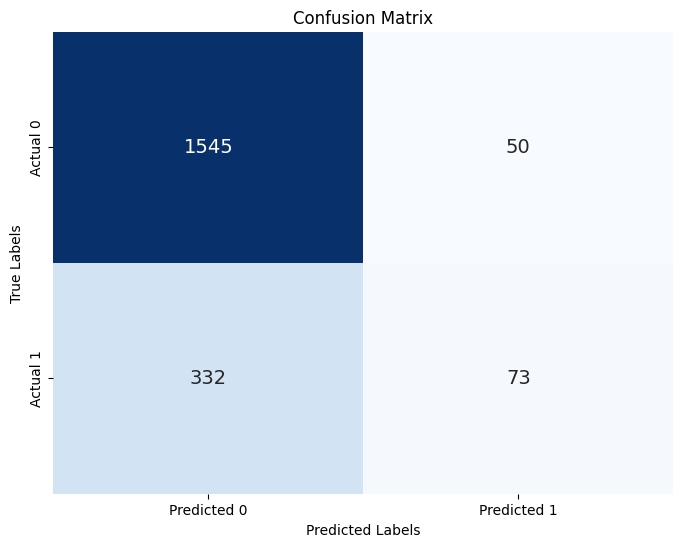

In [176]:
# Get labels for the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)

# Plot confusion matrix heatmap with predicted labels on top
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 14}, 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



### Interpretation Customer Churn:

#### Confusion Matrix:
```
[[1545   50]
 [ 332   73]]
```
- **True Negative (TN):** 1545 customers who were predicted to stay (did not churn) and actually did not churn.
- **False Positive (FP):** 50 customers who were predicted to churn but actually did not churn.
- **False Negative (FN):** 332 customers who were predicted to stay (did not churn) but actually churned.
- **True Positive (TP):** 73 customers who were predicted to churn and actually churned.

#### Metrics:

- **Precision:** Precision measures the accuracy of positive predictions (churn predictions) made by the model.
  - **Precision for not churning (precision 0):** 0.82
    - Out of all customers predicted to not churn, 82% actually did not churn.
  - **Precision for churning (precision 1):** 0.59
    - Out of all customers predicted to churn, 59% actually churned.

- **Recall (Sensitivity):** Recall measures the proportion of actual positives (churned customers) that were correctly identified by the model.
  - **Recall for not churning (recall 0):** 0.97
    - The model correctly identified 97% of the customers who did not churn out of all actual customers who did not churn.
  - **Recall for churning (recall 1):** 0.18
    - The model correctly identified 18% of the customers who churned out of all actual customers who churned.

- **F1-score:** F1-score is the harmonic mean of precision and recall, providing a balance between precision and recall.
  - **F1-score for not churning:** 0.89
  - **F1-score for churning:** 0.28

- **Support:** Number of customers in each class.
  - **Support for not churning (class 0):** 1595
  - **Support for churning (class 1):** 405

- **Accuracy:** Accuracy measures the overall correctness of the model's predictions.
  - **Accuracy:** 0.809 (or 80.9%)
    - 80.9% of all customer predictions (both churned and not churned) were correct.

### Summary in Context of Customer Churn:

- **Precision:** 
  - High precision for not churning (0.82) indicates that when the model predicts a customer will not churn, it is correct 82% of the time. This is important for retaining customers and not falsely flagging loyal customers as potential churners.
  - Lower precision for churning (0.59) suggests that there is a higher rate of false alarms where customers are predicted to churn but do not actually churn. This could lead to unnecessary intervention efforts for customers who may not need it.

- **Recall:**
  - High recall for not churning (0.97) indicates that the model correctly identifies 97% of customers who do not churn. This is crucial for ensuring that customers who are likely to stay are correctly identified.
  - Lower recall for churning (0.18) indicates that the model misses 82% of customers who actually churn. Improving recall for churning is important to accurately identify and take proactive measures with customers who are at risk of churning.

- **F1-score:** 
  - The F1-score for not churning (0.89) is high, indicating a good balance between precision and recall for customers who do not churn.
  - The F1-score for churning (0.28) is lower, suggesting that there is room for improvement in correctly identifying customers who churn while minimizing false alarms.

- **Accuracy:** 
  - Overall accuracy of 80.9% means that the model correctly predicts customer churn or not churn 80.9% of the time. While accuracy is important, focusing on improving precision and recall specific to churned customers may be necessary to effectively manage churn prevention strategies.

### Conclusion:
- These metrics provide a comprehensive view of how well the model performs in predicting customer churn. They highlight strengths (e.g., high precision for customers likely to stay) and areas for improvement (e.g., recall for customers likely to churn). By focusing on improving these metrics, businesses can better tailor their retention strategies and allocate resources more effectively to mitigate customer churn.

In [177]:
# Predicting the probabilities of churn
y_pred_prob = model.predict_proba(X_test)[:, 1]

print('Predicted Probabilities of Churn:')
print(y_pred_prob)


Predicted Probabilities of Churn:
[0.14194046 0.41143185 0.16648174 ... 0.2680726  0.08398785 0.15801431]
